In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)


In [3]:
data.columns = ['review', 'label']
print(data.head())

                                              review  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1


In [4]:
print(data['review'])

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk.. I lose more calls on th...
997                         Item Does Not Match Picture.
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit, never ...
Name: review, Length: 1000, dtype: object


In [20]:
reviews = data['review']

punctuations = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
fnl_reviews = []

for i in reviews: # removing the punctuations
    fnl_review = ""
    for j in i:
        if j in punctuations:
            continue
        else:
            fnl_review += j

    fnl_reviews.append(fnl_review)

cleaned_data = pd.DataFrame({'cleaned_review': fnl_reviews,'label': data['label'] }) # making a new data frame
print(cleaned_data.head())


                                      cleaned_review  label
0  So there is no way for me to plug it in here i...      0
1                          Good case Excellent value      1
2                              Great for the jawbone      1
3  Tied to charger for conversations lasting more...      0
4                                   The mic is great      1


In [22]:
all_words = []
for k in fnl_reviews: # collecting unique words
    words = k.split()
    for a in words:
        all_words.append(a)

# creating vocabulary of unique words
vocab = set(all_words)  # getting unique words
print(vocab)

{'third', 'ft', 'bluetooths', 'found', 'products', 'First', 'Customer', 'Those', 'embedded', 'BUY', 'linking', 'fits', 'said', 'I', 'trouble', 'slim', 'heavyit', 'lense', 'ask', 'BEING', 'shield', '5year', 'units', 'pixel', 'HS850', 'there', 'recently', 'sight', 'additional', 'transfer', 'feet', 'earphone', 'purchase', 'maintain', 'booking', 'Disappointing', 'survived', 'JX10', 'WE', 'onId', 'down', 'Crisp', 'OK', 'here', 'may', 'eventually', '100', 'bitpim', 'PCS', 'waaay', 'user', 'hearing', 'something', 'ever', 'carries', 'loudGlad', 'promised', 'according', 'seen', 'alarm', 'magnetic', 'working', 'friendly', 'faceplates', 'hat', 'extra', '50', 'able', 'color', 'Media', 'battery', 'got', 'understand', 'sturdy', 'Reversible', 'wires', 'incredibly', 'ear', 'humans', 'arrived', 'garbled', 'provide', 'loudest', 'When', 'ones', 'waiting', 'happy', 'capacity', 'trunk', 'wouldnt', 'CingularATT', 'Iam', 'probably', 'Razor', 'not', 'sounds', 'durable', 'easier', 'normal', 'wired', 'upload', 

In [25]:
# creating a word-to-number map
word_to_num = {}
for i, word in enumerate(vocab):
    word_to_num[word] = i + 1

print(word_to_num)

{'third': 1, 'ft': 2, 'bluetooths': 3, 'found': 4, 'products': 5, 'First': 6, 'Customer': 7, 'Those': 8, 'embedded': 9, 'BUY': 10, 'linking': 11, 'fits': 12, 'said': 13, 'I': 14, 'trouble': 15, 'slim': 16, 'heavyit': 17, 'lense': 18, 'ask': 19, 'BEING': 20, 'shield': 21, '5year': 22, 'units': 23, 'pixel': 24, 'HS850': 25, 'there': 26, 'recently': 27, 'sight': 28, 'additional': 29, 'transfer': 30, 'feet': 31, 'earphone': 32, 'purchase': 33, 'maintain': 34, 'booking': 35, 'Disappointing': 36, 'survived': 37, 'JX10': 38, 'WE': 39, 'onId': 40, 'down': 41, 'Crisp': 42, 'OK': 43, 'here': 44, 'may': 45, 'eventually': 46, '100': 47, 'bitpim': 48, 'PCS': 49, 'waaay': 50, 'user': 51, 'hearing': 52, 'something': 53, 'ever': 54, 'carries': 55, 'loudGlad': 56, 'promised': 57, 'according': 58, 'seen': 59, 'alarm': 60, 'magnetic': 61, 'working': 62, 'friendly': 63, 'faceplates': 64, 'hat': 65, 'extra': 66, '50': 67, 'able': 68, 'color': 69, 'Media': 70, 'battery': 71, 'got': 72, 'understand': 73, 'st

In [8]:
# replacing each word in the reviews with its number
encoded_reviews = []
for r in fnl_reviews:
    encoded_review = []
    wrds = r.split()  # splitting into words
    for wrd in wrds:
        encoded_review.append(word_to_num[wrd])
    encoded_reviews.append(encoded_review)


print(encoded_reviews[:10]) # checking the content

[[1445, 26, 783, 1579, 1185, 1251, 1096, 189, 2104, 1268, 1351, 44, 1351, 444, 776, 1483, 14, 1476, 917, 956, 202], [248, 767, 2021, 1201], [1964, 1251, 444, 1139], [2177, 189, 962, 1251, 1900, 683, 2139, 354, 2172, 2017, 1312], [500, 832, 783, 1773], [14, 1977, 189, 1422, 444, 2104, 189, 2029, 1268, 189, 2202, 754, 1518, 189, 2029, 1479, 1455], [119, 1041, 1977, 1199, 620, 1027, 1199, 826, 681, 995, 294, 444, 600, 532, 345, 2219, 532, 1259, 1339, 917, 1339], [119, 1041, 453, 903, 588, 980, 1977, 2186], [866, 189, 1383, 14, 135, 671, 1176], [2182, 956, 1913, 532, 1176, 1023, 2060]]


In [9]:
class Arch_ntwrk(nn.Module): # defining the class
    def __init__(self, vocab_size, embedding_dim, hidden_units, num_layers):
        super(Arch_ntwrk, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_units, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_units, 1)  # for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)  #  the embedding layer
        lstm_out, _ = self.lstm(x)  # passing through the LSTM layer
        lstm_out = lstm_out[:, -1, :]
        out = self.fc(lstm_out)  # through the fully connected layer
        out = self.sigmoid(out)  # the sigmoid activation
        return out


In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.nn.utils.rnn import pad_sequence

# the model parameters
vocab_size = len(vocab) + 1  #  vocab size
embedding_dim = 64            # embedding dimensions
hidden_units = 128            # no. of hidden neurons in LSTM
num_layers = 3                # no. of LSTM layers

# initiating the model
model = Arch_ntwrk(vocab_size, embedding_dim, hidden_units, num_layers)

# defining the loss function, optimizer, and number of epochs
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
n_epochs = 10

# converting data to PyTorch tensors
X_train_tns = [torch.tensor(review, dtype=torch.long) for review in encoded_reviews]
X_train_tn = pad_sequence(X_train_tns, batch_first=True)  # padding
y_train_tn = torch.tensor(data['label'].values, dtype=torch.float32)  # getting labels



losses = []
accuracies = []

for epoch in range(n_epochs): # training & analysing each epoch
    epoch_loss = 0
    correct = 0

    for i in range(len(X_train_tn)):
        optimizer.zero_grad()

        input_seq = X_train_tn[i].unsqueeze(0)
        target = y_train_tn[i].unsqueeze(0)      # ensuring the target has the same shape


        target = target.view(-1, 1)  # ensuring the target size to avoid

        output = model(input_seq)
        loss = criterion(output, target)

        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        correct += (output.round() == target).float().sum().item()

    avg_loss = epoch_loss / len(X_train_tn)
    accuracy = correct / len(X_train_tn)

    losses.append(avg_loss)
    accuracies.append(accuracy)

    print(f'{epoch},loss:{avg_loss},accuracy:{accuracy}')


0,loss:0.6947179290652276,accuracy:0.487
1,loss:0.7018659107089043,accuracy:0.513
2,loss:0.6965939094126224,accuracy:0.528
3,loss:0.6895126202106476,accuracy:0.569
4,loss:0.679334444463253,accuracy:0.589
5,loss:0.6786619106829166,accuracy:0.592
6,loss:0.6740659320056438,accuracy:0.598
7,loss:0.6757882336676121,accuracy:0.597
8,loss:0.6776285787522793,accuracy:0.588
9,loss:0.6786701845228672,accuracy:0.592


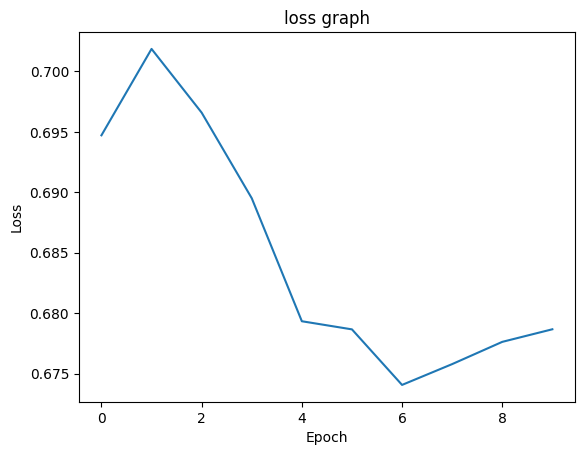

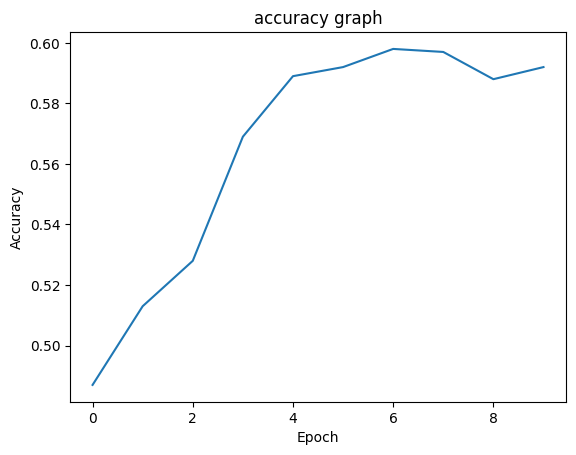

In [18]:
# plotting progress
plt.plot(losses)
plt.title('loss graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(accuracies)
plt.title('accuracy graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

## Exercise 2

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob


nltk.download('punkt') # downloading the NLTK stuff
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
# given paragraph
para = """The larger Broncos will be available with 35-inch off-road tires and will be able
to drive through water nearly 3 feet, 10 inches deep. It has independent front suspension, unlike its main competitor, the Jeep Wrangler. Independent suspension, used
on almost all modern passenger vehicles, generally provides a smoother ride and better on -
road handling than a single solid axle. It still has a solid axle in the back though, like most
pickup trucks, a design suited to hard use. Like the Wrangler, both the two- and four-door
Bronco will have a removable roofs and doors. Buyers will be able to choose either a hard
roof that can be removed in sections, a cloth top, or both. Unlike the Wrangler, though, the
Bronco's doors will fit inside the vehicle after being removed. The Bronco will be available
with a choice of either a 10-speed automatic or seven-speed manual transmission. (The
manual transmission will have six gears for ordinary driving, plus a seventh for low speed
off-road driving.) It will be powered by either a 270- horsepower 2.3-liter turbocharged 4-
cylinder engine or a 310-horsepower 2.7-liter turbocharged V6. While all of the new Bronco
SUVs are designed for hard off-road use, the Bronco Sport isn't quite as hard-core in its
capabilities. It also has more convenience features than the more truck-like Bronco. While
it's based on engineering that's similar to car-like crossover SUVs, Ford says that it's still
intended for serious off-road use. Ford engineers boasted of the off-road testing the
prototypes have been put through, including driving through deep sand, up steep inclines ,
and crawling across boulder-strewn trails."""

para = re.sub(r'[^a-zA-Z0-9\s]', ' ', para) # this will replace the special characters with empty spaces
para = re.sub(r'\s+', ' ', para).strip() # removing multiple empty spaces
para = re.sub(r'\b\w\b', '', para) # removing the single characters


In [14]:
para = para.lower() # converting to lowercase
words = word_tokenize(para) # tokenizing
print(words)



['the', 'larger', 'broncos', 'will', 'be', 'available', 'with', '35', 'inch', 'off', 'road', 'tires', 'and', 'will', 'be', 'able', 'to', 'drive', 'through', 'water', 'nearly', 'feet', '10', 'inches', 'deep', 'it', 'has', 'independent', 'front', 'suspension', 'unlike', 'its', 'main', 'competitor', 'the', 'jeep', 'wrangler', 'independent', 'suspension', 'used', 'on', 'almost', 'all', 'modern', 'passenger', 'vehicles', 'generally', 'provides', 'smoother', 'ride', 'and', 'better', 'on', 'road', 'handling', 'than', 'single', 'solid', 'axle', 'it', 'still', 'has', 'solid', 'axle', 'in', 'the', 'back', 'though', 'like', 'most', 'pickup', 'trucks', 'design', 'suited', 'to', 'hard', 'use', 'like', 'the', 'wrangler', 'both', 'the', 'two', 'and', 'four', 'door', 'bronco', 'will', 'have', 'removable', 'roofs', 'and', 'doors', 'buyers', 'will', 'be', 'able', 'to', 'choose', 'either', 'hard', 'roof', 'that', 'can', 'be', 'removed', 'in', 'sections', 'cloth', 'top', 'or', 'both', 'unlike', 'the', 'wr

In [15]:
# removing the stopwords
stop_words = set(stopwords.words('english'))

fil_words = []
for word in words:
    if word not in stop_words:
        fil_words.append(word)
print(fil_words)

['larger', 'broncos', 'available', '35', 'inch', 'road', 'tires', 'able', 'drive', 'water', 'nearly', 'feet', '10', 'inches', 'deep', 'independent', 'front', 'suspension', 'unlike', 'main', 'competitor', 'jeep', 'wrangler', 'independent', 'suspension', 'used', 'almost', 'modern', 'passenger', 'vehicles', 'generally', 'provides', 'smoother', 'ride', 'better', 'road', 'handling', 'single', 'solid', 'axle', 'still', 'solid', 'axle', 'back', 'though', 'like', 'pickup', 'trucks', 'design', 'suited', 'hard', 'use', 'like', 'wrangler', 'two', 'four', 'door', 'bronco', 'removable', 'roofs', 'doors', 'buyers', 'able', 'choose', 'either', 'hard', 'roof', 'removed', 'sections', 'cloth', 'top', 'unlike', 'wrangler', 'though', 'bronco', 'doors', 'fit', 'inside', 'vehicle', 'removed', 'bronco', 'available', 'choice', 'either', '10', 'speed', 'automatic', 'seven', 'speed', 'manual', 'transmission', 'manual', 'transmission', 'six', 'gears', 'ordinary', 'driving', 'plus', 'seventh', 'low', 'speed', 'ro

In [19]:
# stemming, and lemmatizing the text (tokenizing is already done in the previous cell)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
processed_words = []

for b in fil_words:
    stemmed_word = stemmer.stem(b)
    lemmatized_word = lemmatizer.lemmatize(stemmed_word)
    processed_words.append(lemmatized_word)

print(processed_words)


['larger', 'bronco', 'avail', '35', 'inch', 'road', 'tire', 'abl', 'drive', 'water', 'nearli', 'foot', '10', 'inch', 'deep', 'independ', 'front', 'suspens', 'unlik', 'main', 'competitor', 'jeep', 'wrangler', 'independ', 'suspens', 'use', 'almost', 'modern', 'passeng', 'vehicl', 'gener', 'provid', 'smoother', 'ride', 'better', 'road', 'handl', 'singl', 'solid', 'axl', 'still', 'solid', 'axl', 'back', 'though', 'like', 'pickup', 'truck', 'design', 'suit', 'hard', 'use', 'like', 'wrangler', 'two', 'four', 'door', 'bronco', 'remov', 'roof', 'door', 'buyer', 'abl', 'choos', 'either', 'hard', 'roof', 'remov', 'section', 'cloth', 'top', 'unlik', 'wrangler', 'though', 'bronco', 'door', 'fit', 'insid', 'vehicl', 'remov', 'bronco', 'avail', 'choic', 'either', '10', 'speed', 'automat', 'seven', 'speed', 'manual', 'transmiss', 'manual', 'transmiss', 'six', 'gear', 'ordinari', 'drive', 'plu', 'seventh', 'low', 'speed', 'road', 'drive', 'power', 'either', '270', 'horsepow', 'liter', 'turbocharg', 'c

In [17]:
# analysing sentiment & subjectivity using SentimentIntensityAnalyzer & Textblob
sem_a = SentimentIntensityAnalyzer()
t = " ".join(processed_words)
senti_scores = sem_a.polarity_scores(t)

print("Sentiment",senti_scores)

blob = TextBlob(" ".join(processed_words))
b_txt_subj = blob.sentiment.subjectivity

print("Subjectivity",b_txt_subj)

Sentiment {'neg': 0.043, 'neu': 0.845, 'pos': 0.113, 'compound': 0.9136}
Subjectivity 0.41339712918660293


## since the Subjectivity score is 0.41 it means that the given text (para) is a bit subjective